<center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQEbIXZiRVkJPQ/feedshare-shrink_2048_1536/0?e=1602115200&v=beta&t=XHE3KbzKbKy54WYDTfq7VFNUPfNjoIOrjBw6dzFPTfA" width="1000"></center>

# SDC Certified Program in Python for Data Science

## Tema 8. Discretización de datos


### Prof. Manuel Sigüeñas, M.Sc.(c) 

[Perfil](https://socialdata-peru.com/learning/teacher2.php)

### Prof. Lenguajes de Programación para Ciencia de Datos / Agile Data Scientists / SCRUMStudy Certified Trainer


[msiguenas@socialdata-peru.com](msiguenas@socialdata-peru.com)}

1. [Discretización](#part1)
2. [Discretización por intervalos de igual amplitud](#part2)
3. [Discretización Cuantil](#part3)
4. [Discretización por kmeans](#part4)
5. [Discretización por Entropia](#part5)
6. [Laboratorio 7](#part7)

In [1]:
# Load the packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Warehousing (proyecto de almacenamiento de datos) puede resultar en terabytes de datos: Tareas complejas de data mining o machine learning pueden demorar mucho tiempo en ejecutarse sobre el conjunto completo de datos. Ante este problema surge la idea de reducción de datos, cuyo objetivo es buscar una representación reducida del conjunto de datos que es mucho más pequeña en volumen, pero produce los mismos (o casi iguales) resultados. Las estrategias de reducción de datos son: agregación del cubo de datos. discretización y reducción de la dimensionalidad. En esta sección nos ocuparemos de la discretización de datos:

# Cooperativas

### Información del conjunto de datos

Los datos es la información que instituciones financieras remiten al organismo encargado de la regulación y supervisión del Sistema Financiero cada mes y se encuentra toda la informacion de su cartera de creditos a una fecha determinada.

In [1]:
# Load the packages
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

data = pd.read_csv("D:/Python/1. Nivel I/8/datos/data.csv",
                  sep=",",
                 encoding="ISO-8859-1")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19375 entries, 0 to 19374
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   genero     19375 non-null  int64
 1   est_civil  19375 non-null  int64
 2   tpers      19375 non-null  int64
 3   cal        19375 non-null  int64
 4   edad       19375 non-null  int64
 5   clase      19375 non-null  int64
dtypes: int64(6)
memory usage: 908.3 KB


<a id='part1'></a>
## Discretización

Es un método que transforma datos cuantitativos en cualitativos. El proceso de aprendizaje es frecuentemente menos eficiente cuando los datos son solo cuantitativos.

**Métodos Top-Down:** 

se inicia con una lista vac´ıa de puntos de corte y se continúan agregando nuevos puntos a la lista ‘’separando” los intervalos mientras la Discretización progresa.

**Métodos Bottom-Up:**

se inicia con la lista completa de todos los valores continuos de la variable como puntos de corte y se eliminan algunos de ellos ‘’juntando” los intervalos mientras la Discretización
progresa.

También se pueden dividir en:

**Discretización Dinámica:** algunos algoritmos de clasificación tienen incorporados mecanismos para discretizar atributos continuos (por ejemplo, árboles de decisión). Los atributos continuos son discretizados durante el proceso de clasificación.

**Discretización Estática:** Es un paso más en el preprocesamiento de datos. Los atributos continuos son previamente discretizados antes de la tarea de clasificación.

A considerar:

- No existe una ventaja clara de algunos de los métodos (Dougherty, Kohavi, and Sahami, 1995).
- También es conocido como ‘’Binning”.

____
[Ir a inicio](#beginning)

<a id='part2'></a>
## Discretización por intervalos de igual amplitud

In [3]:
from sklearn.preprocessing import KBinsDiscretizer
import math

In [4]:
n = len(data)
k = 1 + math.log2(n)
k=round(k,0)
k

15.0

##### Proceso:

- Es similar a la elaboración de tablas de frecuencia y de contingencia.
- Se divide el rango de la variable en k intervalos de igual tamaño.
- k es determinado por alguna regla, para la aplicación consideramos sturges.

**Desventajas:** No supervisado. Sensible a outliers.

**Ventajas:** Fácil de implementar. Produce una abstracción de los datos razonable.

In [5]:
est = KBinsDiscretizer(n_bins=9, encode='ordinal', strategy="uniform")

In [6]:
nuevo = est.fit_transform(data[['edad']])

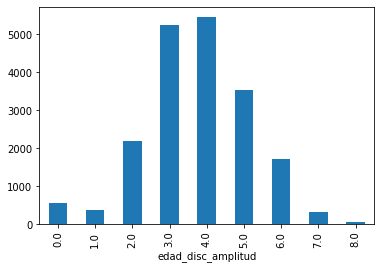

In [7]:
xs = pd.DataFrame(nuevo)
xs.columns = ['edad_disc_amplitud']
xs.groupby('edad_disc_amplitud').size().plot(kind='bar')

____
[Ir a inicio](#beginning)

<a id='part3'></a>
## Discretización Cuantil

##### Proceso:

- Se debe dividir el rango en k intervalos.
- Para la construcción de los intervalos se debe tener en cuenta la discretización por cuantil.
- No se utiliza la información de la clase.

In [8]:
from sklearn.preprocessing import KBinsDiscretizer

In [8]:
estq = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [9]:
nuevoq = estq.fit_transform(data[['edad']])

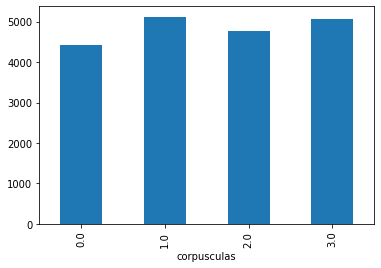

In [10]:
xq = pd.DataFrame(nuevoq)
xq.columns = ['corpusculas']
xq.groupby('corpusculas').size().plot(kind='bar')

____
[Ir a inicio](#beginning)

<a id='part4'></a>
## Discretización por kmeans

In [11]:
from sklearn.preprocessing import KBinsDiscretizer

In [12]:
estkmeas = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')

In [13]:
nuevokmeas = estkmeas.fit_transform(data[['edad']])

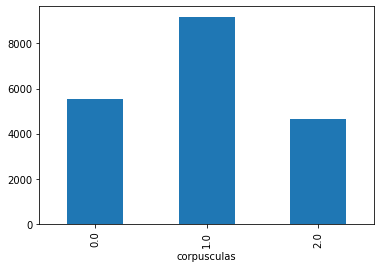

In [14]:
xkmeans = pd.DataFrame(nuevokmeas)
xkmeans.columns = ['corpusculas']
xkmeans.groupby('corpusculas').size().plot(kind='bar')

<a id='part5'></a>
## Discretización por Entropia

In [17]:
X = data.iloc[:, data.columns != 'clase'].values#Selecciona menos la variable Prestamo
y = data.iloc[:, -1].values#Selecciona menos la ultima columna

In [18]:
big_array=[4]#Especificar las posiciones para aplicar dataframe
numeric_features=np.array(big_array)#Convertirlos a un array de numpy

In [19]:
from MDLP import MDLP_Discretizer

In [20]:
discretizer = MDLP_Discretizer(features=numeric_features)#Defino la funcion de discretizacion con las posiciones que debe convertir
discretizer.fit(X, y)#Entrena la discretizacion con la data de entrenamiento
X_train_discretized = discretizer.transform(X)#Transforma la discretizacion de la data de entrenamiento

C:\Users\SOCIAL DATA\MDLP.py:171: RuntimeWarning: invalid value encountered in greater
  mask = np.logical_and((self._boundaries[:, feature_idx] > range_min), (self._boundaries[:, feature_idx] < range_max))
C:\Users\SOCIAL DATA\MDLP.py:171: RuntimeWarning: invalid value encountered in less
  mask = np.logical_and((self._boundaries[:, feature_idx] > range_min), (self._boundaries[:, feature_idx] < range_max))


In [21]:
A=X_train_discretized[:,4]#Selecciono los valores de la columna "Age" de la data de entrenamiento
df_age = pd.DataFrame(A,columns=['edad_discretizada'])#Genero un dataframe a partir del los valores de "Age"

5     13827
8      2521
9       721
11      412
6       391
10      350
1       339
4       237
7       202
2       136
0       122
12       63
3        54
Name: edad_discretizada, dtype: int64


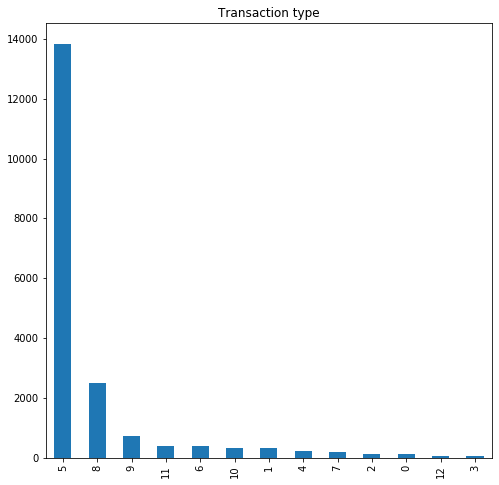

In [22]:
print(df_age.edad_discretizada.value_counts())#Agrupa los diferentes grupos

f, ax = plt.subplots(1, 1, figsize=(8, 8))#Defino la dimensionalidad del grafico
df_age.edad_discretizada.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))#Coloco la data la misma que imprimi arriba
plt.show()#Muestra el grafico

In [23]:
#ver cómo se discretizó la variable en la posicion 37 "age"
print ('Interval cut-points: %s' % str(discretizer._cuts[4]))#Los puntos de corte
print ('Bin descriptions: %s' % str(discretizer._bin_descriptions[4]))#Muestra el encode que se asigno a cada uno

Interval cut-points: [4.5, 7.5, 10.5, 12.5, 17.5, 51.5, 52.5, 53.5, 61.5, 66.5, 68.5, 77.5]
Bin descriptions: {0: '-inf_to_4.5', 1: '4.5_to_7.5', 2: '7.5_to_10.5', 3: '10.5_to_12.5', 4: '12.5_to_17.5', 5: '17.5_to_51.5', 6: '51.5_to_52.5', 7: '52.5_to_53.5', 8: '53.5_to_61.5', 9: '61.5_to_66.5', 10: '66.5_to_68.5', 11: '68.5_to_77.5', 12: '77.5_to_inf'}


<a id='part7'></a>
## 3.  Laboratorio 7

Autor: Semeion, Centro de Investigación de Ciencias de la Comunicación, Roma, Italia.

Fuente: [UCI] (http://archive.ics.uci.edu/ml/datasets/steel+plates+faults)

Cite: Conjunto de datos proporcionado por Semeion, Centro de Investigación de Ciencias de la Comunicación, Via Sersale 117, 00128, Roma, Italia.

Conjunto de datos de fallas de placas de acero
Un conjunto de datos de fallas de placas de acero, clasificadas en 7 tipos diferentes. El objetivo era entrenar el aprendizaje automático para el reconocimiento automático de patrones.

El conjunto de datos consta de 27 características que describen cada falla (ubicación, tamaño, ...) y 7 características binarias que indican el tipo de falla (en 7: Pastelería, Z_Scratch, K_Scatch, Manchas, Suciedad, Golpes, Otras Fallas). Este último se usa comúnmente como un objetivo de clasificación binaria (falla 'común' u 'otra').

### Información de atributos
* V1: X_Minimum
* V2: X_Maximum
* V3: Y_Mínimo
* V4: Y_ Máximo
* V5: Pixels_Areas
* V6: X_Perimeter
* V7: Y_Perímetro
* V8: Suma_de_Luminosidad
* V9: Mínimo_de_Luminosidad
* V10: Máxima_de_Luminosidad
* V11: Longitud del transportador
* V12: TypeOfSteel_A300
* V13: TypeOfSteel_A400
* V14: Steel_Plate_Thickness
* V15: Edges_Index
* V16: índice_vacío
* V17: Square_Index
* V18: Outside_X_Index
* V19: Edges_X_Index
* V20: Edges_Y_Index
* V21: Outside_Global_Index
* V22: LogOfAreas
* V23: Log_X_Index
* V24: Log_Y_Index
* V25: Orientation_Index
* V26: Índice de Luminosidad
* V27: SigmoidOfAreas
* V28: pastelería
* V29: Z_Scratch
* V30: K_Scatch
* V31: manchas
* V32: suciedad
* V33: golpes
* Class: Otros_Fallas

### Documentos relevantes
1.M Buscema, S Terzi, W Tastle, A New Meta-Classifier, en NAFIPS 2010, Toronto (CANADÁ), 26-28 de julio de 2010, 978-1-4244-7858-6 / 10 © 2010 IEEE
2.M Buscema, MetaNet: The Theory of Independent Judges, in Substance Use & Maluse, 33 (2), 439-461,1998

**Información**:

1. Edad de la esposa (numérica)

2. Educación de la esposa (categórica) 1 = baja, 2, 3, 4 = alta

3. Educación del esposo (categórica) 1 = baja, 2, 3, 4 = alta

4. Número de hijos nacidos (numérico)

5. Religión de la esposa (binaria) 0 = No Islam, 1 = Islam

6. ¿La esposa ahora está trabajando? (binario) 0 = Sí, 1 = No

7. Ocupación del esposo (categórica) 1, 2, 3, 4

8. Índice de nivel de vida (categórico) 1 = bajo, 2, 3, 4 = alto

9. Exposición a los medios (binario) 0 = Bueno, 1 = No bueno

10. Método anticonceptivo utilizado (atributo de clase) 1 = Sin uso, 2 = A largo plazo, 3 = A corto plazo

In [25]:
import numpy as np
import pandas as pd

df_fall_placa_acero = pd.read_csv('D:/Python/1. Nivel I/8/datos/php9xWOpn.csv',  sep=',')
df_fall_placa_acero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1941 non-null   int64  
 1   V2      1941 non-null   int64  
 2   V3      1941 non-null   int64  
 3   V4      1941 non-null   int64  
 4   V5      1941 non-null   int64  
 5   V6      1941 non-null   int64  
 6   V7      1941 non-null   int64  
 7   V8      1941 non-null   int64  
 8   V9      1941 non-null   int64  
 9   V10     1941 non-null   int64  
 10  V11     1941 non-null   int64  
 11  V12     1941 non-null   int64  
 12  V13     1941 non-null   int64  
 13  V14     1941 non-null   int64  
 14  V15     1941 non-null   float64
 15  V16     1941 non-null   float64
 16  V17     1941 non-null   float64
 17  V18     1941 non-null   float64
 18  V19     1941 non-null   float64
 19  V20     1941 non-null   float64
 20  V21     1941 non-null   float64
 21  V22     1941 non-null   float64
 22  

Actividad
1. Encontrar el numero de bins con la tecnica de Sturges
2. Discretizacion por intervalos de igual amplitud de la variable "V9" (Grafico de Barras)
3. Discretizacion por cuantil de la variable "V19" (Grafico de barras)
4. Discretizacion por kmeans de la variable "V15" (Grafico de barras)

In [26]:
columns_continuas = ['V1','V2','V3','V4','V5','V6','V7',
    'V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20'
     ,'V21','V22','V23','V24','V25','V26','V27']


[Ir a Inicio](#beginning)

_____